In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="darkgrid")
df = pd.read_csv("netflix_titles.csv")
df.head()
df.shape
df.columns


Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [10]:
#cleaning

df.isnull().sum()


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [12]:
df.duplicated().sum()

0

In [18]:
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')
df['country'] = df['country'].fillna('Unknown')
df['date_added'] = df['date_added'].str.strip()
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['date_added'] = df['date_added'].fillna(pd.Timestamp('2000-01-01'))
df['year_added'] = df['date_added'].dt.year




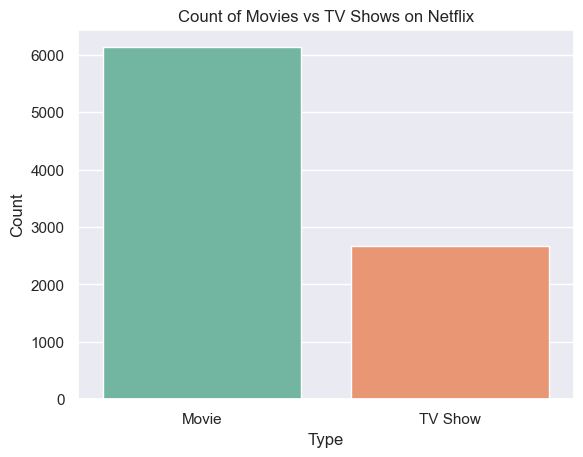

<Figure size 640x480 with 0 Axes>

In [47]:
#visualisations
sns.countplot(data=df, x='type', hue='type', palette='Set2', legend=False)

plt.title('Count of Movies vs TV Shows on Netflix')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()
plt.savefig('type_distribution.png')


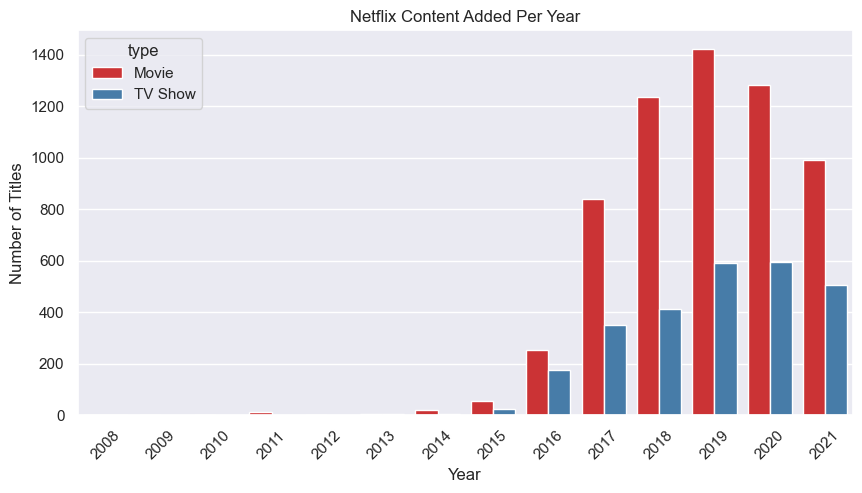

<Figure size 640x480 with 0 Axes>

In [26]:
df_year = df[df['year_added'] >= 2008]
plt.figure(figsize=(10,5))
sns.countplot(data=df_year, x='year_added', hue='type', palette='Set1')
plt.title('Netflix Content Added Per Year')
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.show()
plt.savefig('content_over_time.png')


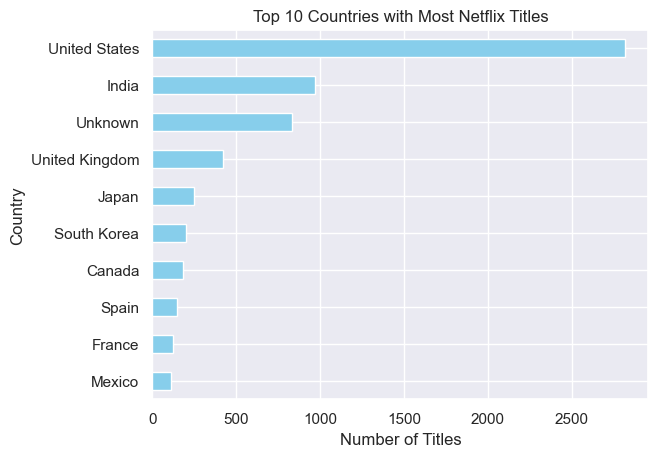

<Figure size 640x480 with 0 Axes>

In [49]:
top_countries = df['country'].value_counts().head(10)
top_countries.plot(kind='barh', color='skyblue')
plt.title('Top 10 Countries with Most Netflix Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.gca().invert_yaxis()
plt.show()
plt.savefig('top_countries.png')

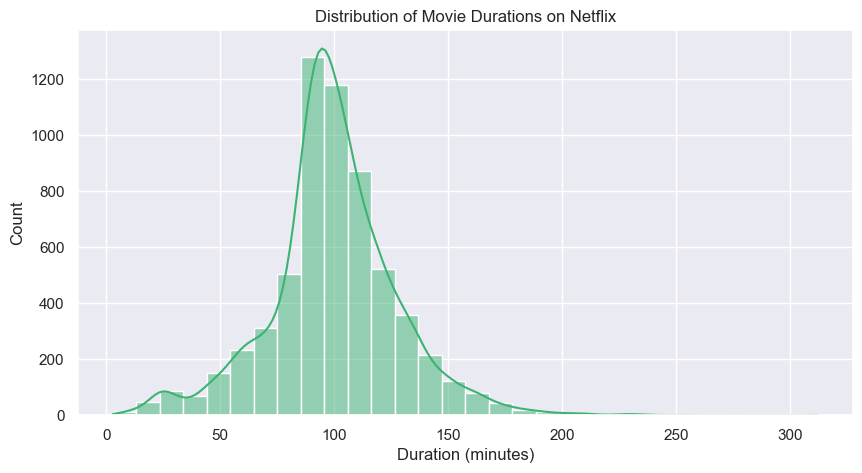

<Figure size 640x480 with 0 Axes>

In [51]:
# Filter only movies
movies = df[df['type'] == 'Movie'].copy()
# Convert duration from "90 min" to integer
movies['duration_minutes'] = movies['duration'].str.replace(' min', '').astype('float')
# Plot
plt.figure(figsize=(10,5))
sns.histplot(data=movies, x='duration_minutes', bins=30, kde=True, color='mediumseagreen')
plt.title('Distribution of Movie Durations on Netflix')
plt.xlabel('Duration (minutes)')
plt.ylabel('Count')
plt.show()



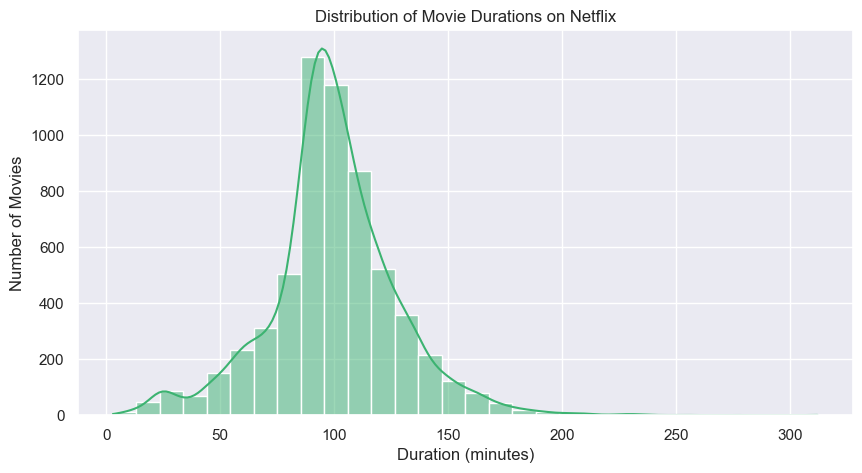

In [57]:
movies = df[df['type'] == 'Movie'].copy()
movies['duration_minutes'] = movies['duration'].str.replace(' min', '').astype(float)
movies['duration_minutes'] = movies['duration'].str.replace(' min', '', regex=False).astype(float)
plt.figure(figsize=(10,5))
sns.histplot(data=movies, x='duration_minutes', bins=30, kde=True, color='mediumseagreen')
plt.title('Distribution of Movie Durations on Netflix')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.savefig('duration_histogram.png')
plt.show()



In [40]:
!pip install wordcloud


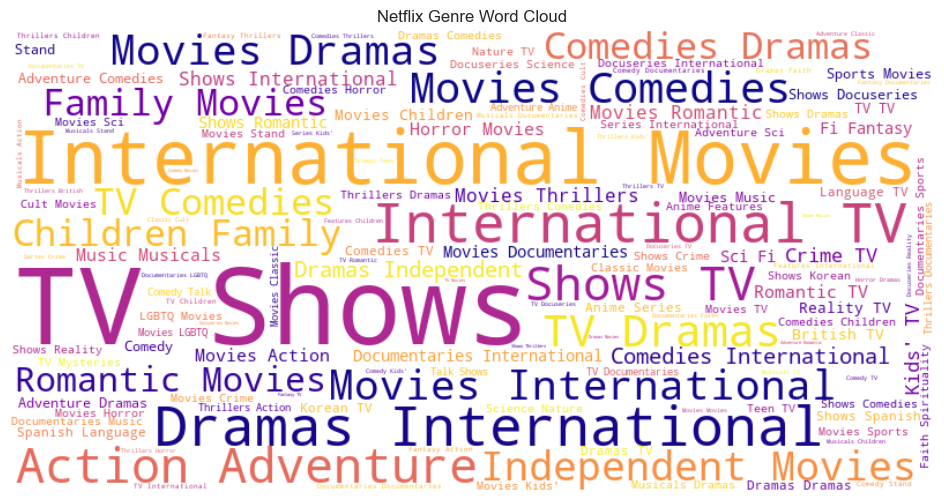

In [45]:
# Step 1: Create flat_genres from the 'listed_in' column
all_genres = df['listed_in'].dropna().str.split(', ')
flat_genres = [genre for sublist in all_genres for genre in sublist]

# Step 2: Join all genres into a single string for the word cloud
genre_text = ' '.join(flat_genres)

# Step 3: Import WordCloud and generate the word cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='plasma').generate(genre_text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Netflix Genre Word Cloud')
plt.show()

# Step 4: Save the word cloud image
wordcloud.to_file('genre_wordcloud.png')
